In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
print(diabetes_x.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression(fit_intercept=True)

In [8]:
data_y = pd.DataFrame(diabetes_y)
data_x = pd.DataFrame(diabetes_x)

In [9]:
data_x.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [10]:
data_y.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [19]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42)

In [20]:
lm.fit(data_x_opetus, data_y_opetus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
ennustukset_opetus = lm.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

2868.546584216565


In [22]:
ennustukset_validointi = lm.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

2900.1732878832318


In [24]:
from statsmodels.api import OLS
print(OLS(data_y_opetus,data_x_opetus).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              5.378
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                    2.13e-07
Time:                        11:42:17   Log-Likelihood:                         -2293.0
No. Observations:                 353   AIC:                                      4606.
Df Residuals:                     343   BIC:                                      4645.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(0,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        data_x, data_y, test_size=0.2, random_state=689*i)
    
    lm.fit(data_x_opetus, data_y_opetus)
    
    ennustukset_opetus = lm.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = lm.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [29]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[2734.7292724  2737.91484028 2923.88885119 2856.89679567 2802.38472392
 2847.36850038 2883.19787184 2724.75464474 2901.99107338 2839.74984502]


2825.2876418822607


In [30]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[3424.31668821 3494.18820481 2644.87276503 2943.42631118 3148.23908067
 2938.79659858 2830.58629326 3424.53287913 2826.95242636 3100.85158983]


3077.676283704354


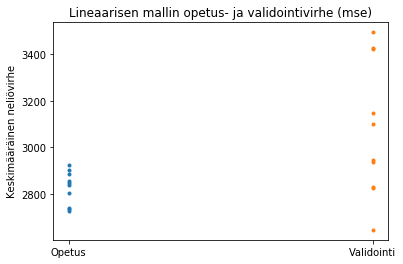

In [31]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [32]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.55392854 0.55152595 0.50474709 0.51524205 0.52706451 0.51440942
 0.50707454 0.54373029 0.50947626 0.52113168]


0.5248330338867533


In [33]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.33222203 0.33096602 0.55820409 0.50667559 0.47023142 0.52490232
 0.5470889  0.40575805 0.52453214 0.47698272]


0.4677563284045683


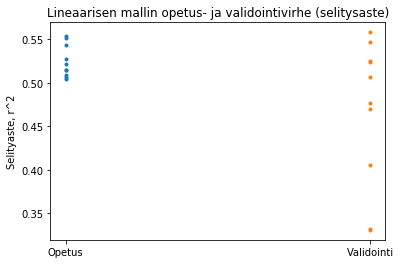

In [35]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selityaste, r^2')

plt.show()

In [36]:
lm.coef_

array([[ -70.66257069, -308.027991  ,  520.09756968,  324.07622071,
        -898.17340624,  581.42824445,  165.20012116,  279.6520691 ,
         771.18818764,   22.3235087 ]])